In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [9]:
df = pd.read_excel('F:\Data-Analysis-master\Data-Analysis-master\GlobalSuperstore.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


# explore the data

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
Row ID            51290 non-null int64
Order ID          51290 non-null object
Order Date        51290 non-null datetime64[ns]
Ship Date         51290 non-null datetime64[ns]
Ship Mode         51290 non-null object
Customer ID       51290 non-null object
Customer Name     51290 non-null object
Segment           51290 non-null object
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Postal Code       9994 non-null float64
Market            51290 non-null object
Region            51290 non-null object
Product ID        51290 non-null object
Category          51290 non-null object
Sub-Category      51290 non-null object
Product Name      51290 non-null object
Sales             51290 non-null float64
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null fl

In [37]:
df.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [39]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375818
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296810
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


# creating RFM features for each customer

In [10]:
RFM_table = df.groupby('Customer ID').agg({'Order Date': lambda y: (df['Order Date'].max().date() - y.max().date()).days, # Recency no. of days from the last day of purchas
                                        'Order ID': lambda y: y.nunique(),   #Order ID frequency(no. of times a person has bought)
                                        'Sales': lambda y: round(y.sum(),2)})  #total money spent on store
RFM_table.columns = ['Recency', 'Frequency', 'Monetary']
RFM_table = RFM_table.sort_values('Monetary', ascending=False)
RFM_table.head()

,Recency,Frequency,Monetary
Customer ID,,,
TA-21385,18,25,35668.12
GT-14710,8,30,34471.89
TC-20980,27,28,34218.27
SM-20320,21,21,31125.29
BW-11110,54,35,30613.62


# creating a segmented RFM table using quartiles

In [11]:
quantiles = RFM_table.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [12]:
segmented_rfm = RFM_table

In [13]:
def RScore(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [14]:
segmented_rfm['Recency Quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles,))
segmented_rfm['Frequency Quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
segmented_rfm['Monetary Quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

segmented_rfm.head()

,Recency,Frequency,Monetary,Recency Quartile,Frequency Quartile,Monetary Quartile
Customer ID,,,,,,
TA-21385,18,25,35668.12,2,2,1
GT-14710,8,30,34471.89,1,1,1
TC-20980,27,28,34218.27,2,1,1
SM-20320,21,21,31125.29,2,2,1
BW-11110,54,35,30613.62,3,1,1


In [15]:
#since we have 1 -4 we dont have to standardize

In [16]:
from sklearn.cluster import KMeans

In [18]:
wcss = []
ind = []
for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit(segmented_rfm.iloc[:,3:])
    wcss_value = kmeans.inertia_
    wcss.append([i, wcss_value])
    index_list = ind.append(i)
wcss_table = pd.DataFrame(data = np.array(wcss).reshape((9, 2)), index = index_list, columns = ['cluster','wcss'])

Text(0, 0.5, 'Within Cluster Sum Of Squares')

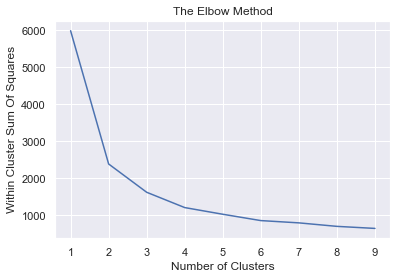

In [19]:
plt.plot(range(1, 10), np.array(wcss)[:,1:])
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum Of Squares')

# building the model

In [20]:
kmeans = KMeans(4)

In [22]:
segmented_rfm['Clusters'] = kmeans.fit_predict(segmented_rfm)

# plot the data points

In [29]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'Monetary')

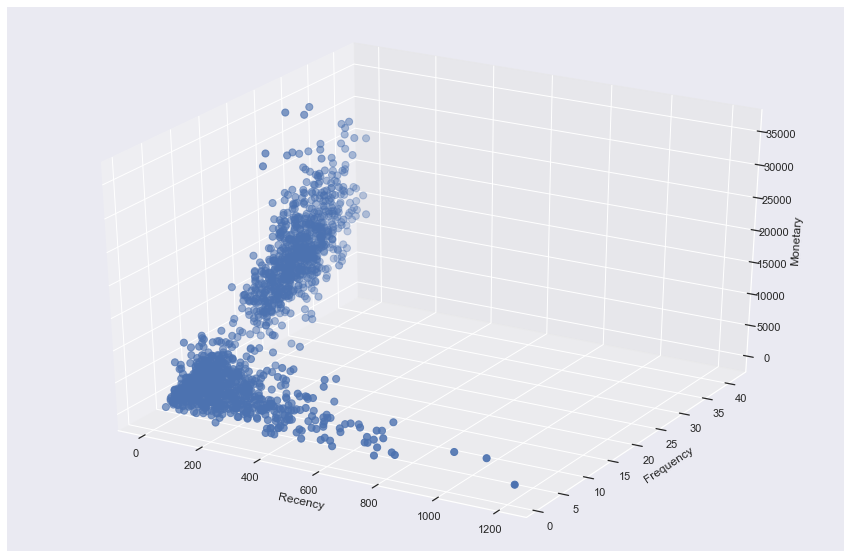

In [30]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(RFM_table.Recency, RFM_table.Frequency, RFM_table.Monetary, s=50)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

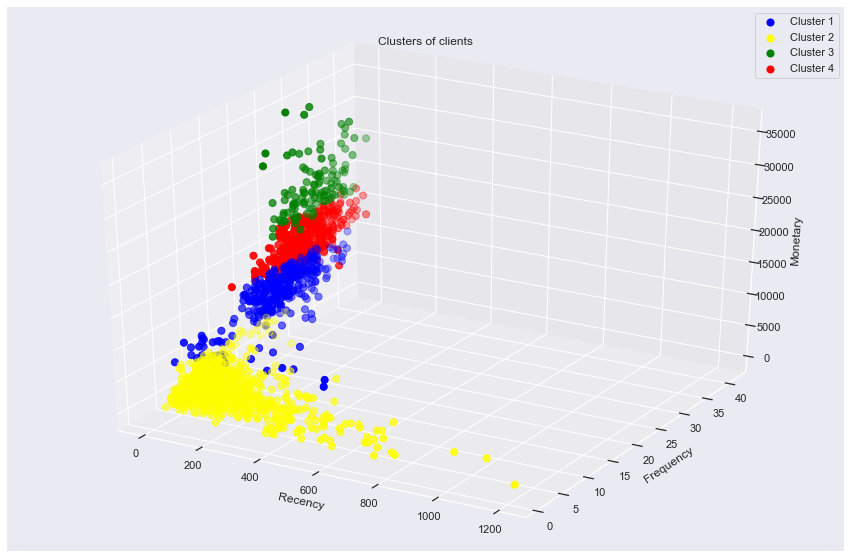

In [32]:
fig = plt.figure(figsize=(15,10))
dx = fig.add_subplot(111, projection='3d')
colors = ['blue', 'yellow', 'green', 'red']

for i in range(0,4):
    dx.scatter(RFM_table[RFM_table.Clusters == i].Recency, 
               RFM_table[RFM_table.Clusters == i].Frequency, 
               RFM_table[RFM_table.Clusters == i].Monetary, 
               c = colors[i], 
               label = 'Cluster ' + str(i+1), 
               s=50)

dx.set_title('Clusters of clients')
dx.set_xlabel('Recency')
dx.set_ylabel('Frequency')
dx.set_zlabel('Monetary')
dx.legend()

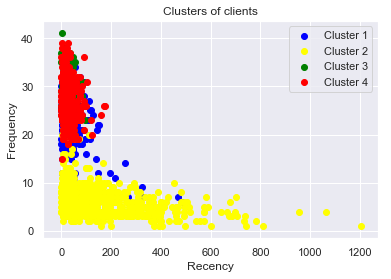

In [33]:


c1 = RFM_table[RFM_table.Clusters == 0]
c2 = RFM_table[RFM_table.Clusters == 1]
c3 = RFM_table[RFM_table.Clusters == 2]
c4 = RFM_table[RFM_table.Clusters == 3]

plt.scatter(c1.Recency, c1.Frequency, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.Recency, c2.Frequency, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.Recency, c3.Frequency, c = 'green', label = 'Cluster 3')
plt.scatter(c4.Recency, c4.Frequency, c = 'red', label = 'Cluster 4')

plt.title('Clusters of clients')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()



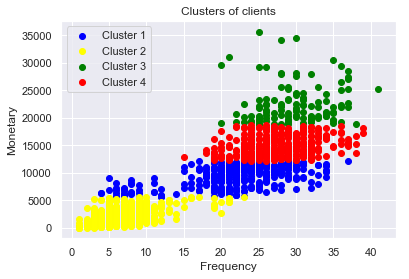

In [34]:
c1 = RFM_table[RFM_table.Clusters == 0]
c2 = RFM_table[RFM_table.Clusters == 1]
c3 = RFM_table[RFM_table.Clusters == 2]
c4 = RFM_table[RFM_table.Clusters == 3]

plt.scatter(c1.Frequency, c1.Monetary, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.Frequency, c2.Monetary, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.Frequency, c3.Monetary, c = 'green', label = 'Cluster 3')
plt.scatter(c4.Frequency, c4.Monetary, c = 'red', label = 'Cluster 4')

plt.title('Clusters of clients')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend()

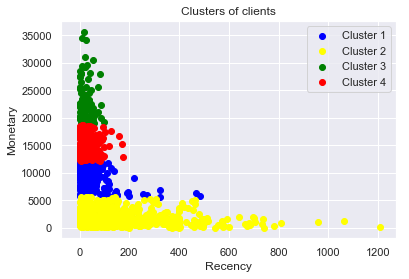

In [36]:
C1 = RFM_table[RFM_table.Clusters == 0]
C2 = RFM_table[RFM_table.Clusters == 1]
C3 = RFM_table[RFM_table.Clusters == 2]
C4 = RFM_table[RFM_table.Clusters == 3]

plt.scatter(C1.Recency, C1.Monetary, c = 'blue', label = 'Cluster 1')
plt.scatter(C2.Recency, C2.Monetary, c = 'yellow', label = 'Cluster 2')
plt.scatter(C3.Recency, C3.Monetary, c = 'green', label = 'Cluster 3')
plt.scatter(C4.Recency, C4.Monetary, c = 'red', label = 'Cluster 4')

plt.title('Clusters of clients')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend()